<a href="https://colab.research.google.com/github/anarghya-04/ICSSL_Class1/blob/main/bootstrapping_permutation_randomization_tests_CSSL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The new diabetes drug- Gluco-No-Mo!

Consider a new drug being tested for diabetes reversal. It's called _Gluco-No-Mo_. HbA1c (Hemoglobin A1c) measures the average blood sugar (glucose) over the past 2-3 months, showing the percentage of red blood cell's hemoglobin coated in sugar. A reduction in HbA1c is a sign improving outcome. Below are the outcomes measured as a reduction in HbA1c levels for the control and treatment groups.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
np.random.seed(1) #To ensure reproducibility. TO set the results such that everytime you run a call, you get the same results.

# HbA1c reduction (higher is better)
control = np.array([0.3, 0.4, 0.2, 0.1, 0.5, 0.3, 0.4, 0.2, 0.3, 0.1])
treatment = np.array([0.8, 0.7, 0.6, 0.9, 0.5, 0.7, 0.6, 0.8, 0.9, 0.7])

##Task 1
Calculate the observed in means between the control and treatment groups.

In [2]:
# Type your code here
obs_control_mean = control.mean()
obs_treatment_mean = treatment.mean()

print(f"Observed Control Mean = {obs_control_mean} and Observed treatment mean = {obs_treatment_mean}")

obs_diff_means = obs_treatment_mean-obs_control_mean
print(f"Observed Diference between means = {obs_diff_means}")

Observed Control Mean = 0.28 and Observed treatment mean = 0.72
Observed Diference between means = 0.43999999999999995


How confident are you that the difference you are seeing is actually because of the drug is effective? Can you estimate the confidence interval around this difference in means?

We can of course do it if we were allowed to repeat this experiment a large number of times. However, since we have limited resources and time, is there any other way to do this with a single sample dataset?

# Bootstrapping - _"How variable is my estimator?"_

Bootstrapping estimates the sampling distribution of a statistic by repeatedly resampling with replacement from the observed data. It is typically used for estimating standard errors, constructing confidence intervals and assessing bias of an estimator. To understand how bootstrapping works in more detail, take a look at [this video](https://www.youtube.com/watch?v=Xz0x-8-cgaQ).

### Assumptions in bootstrapping
* The observed sample approximates the population
* Resampling mimics repeated sampling from that population

Let's try bootstrapping the observed dataset to create a sampling distribution

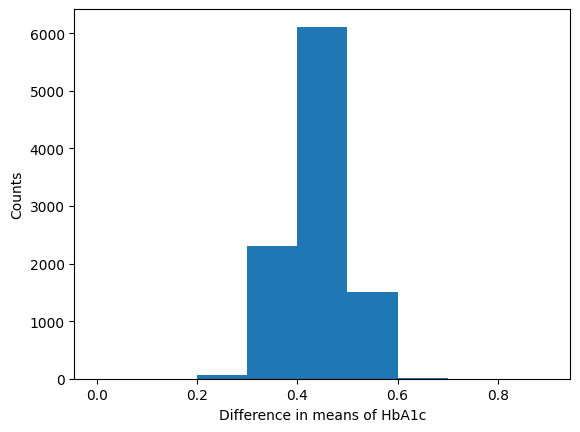

array([0.33, 0.55])

In [13]:
# Step 1 - Decide on the number of times you wish to bootstrap and
# create an array of that size to store the differences
B = 10000
diff_in_means = np.zeros(B)

# Step 2 - Create a loop to generate bootstrap samples for both control and
# treatment. Also record the mean difference for each iteration
for i in range(B):
  control_bootstrapped_sample = np.random.choice(control, size=10, replace=True)
  treatment_bootstrapped_sample = np.random.choice(treatment, size=10, replace=True)
  mean_diff = treatment_bootstrapped_sample.mean()-control_bootstrapped_sample.mean()
  diff_in_means[i] = mean_diff

# Step 3 - Plot the histogram of the mean differences
fig, ax = plt.subplots()
ax.hist(diff_in_means, bins=np.arange(0,1,0.1)) #or can specify bins as an integer (e.g. 10)
ax.set_xlabel("Difference in means of HbA1c")
ax.set_ylabel("Counts")
plt.show()

# Step 4 - Estimate the 97% confidence interval
np.percentile(diff_in_means,[2.5,97.5]) #gives boundaries

In [ ]:
for x in range(1,10,2):
  print(x)

1
3
5
7
9


In [ ]:
for x in np.arange(1,10,2):
  print(x)

1
3
5
7
9


In [4]:
new_control_bootstrapped_sample = np.random.choice(control, size=10, replace=True)
new_control_bootstrapped_sample

array([0.2, 0.5, 0.3, 0.2, 0.5, 0.2, 0.5, 0.2, 0.2, 0.1])

In [6]:
help(np.zeros)

Help on built-in function zeros in module numpy:

zeros(...)
    zeros(shape, dtype=float, order='C', *, like=None)

    Return a new array of given shape and type, filled with zeros.

    Parameters
    ----------
    shape : int or tuple of ints
        Shape of the new array, e.g., ``(2, 3)`` or ``2``.
    dtype : data-type, optional
        The desired data-type for the array, e.g., `numpy.int8`.  Default is
        `numpy.float64`.
    order : {'C', 'F'}, optional, default: 'C'
        Whether to store multi-dimensional data in row-major
        (C-style) or column-major (Fortran-style) order in
        memory.
    like : array_like, optional
        Reference object to allow the creation of arrays which are not
        NumPy arrays. If an array-like passed in as ``like`` supports
        the ``__array_function__`` protocol, the result will be defined
        by it. In this case, it ensures the creation of an array object
        compatible with that passed in via this argument.



## Homework
What happens when you bootstrap a very small dataset, let us say n=5? and when n=50.


# Randomization test _"Could random assignment alone produce this effect?"_

Suppose patients were randomly assigned to treatment or control in the study.

The reshuffling recreates the actual random assignment mechanism.

We want to know what is the probability of seeing a treatment effect this large purely due to random assignment, assuming no causal effect of the drug.

H₀:The diabetes drug has no effect.

H₁:The diabetes drug has an effect.

Redefine the study based on assignment of experimental units to Treatment and Control groups

In [15]:
# 0 = control, 1 = treatment ; treatment and control groups were assigned through randomization
assignment = np.array([0,1,1,0,0,0,1,0,1,1,1,1,0,1,0,1,0,1,0,0])

# HbA1c reduction
outcomes = np.array([
    0.3, 0.8, 0.7, 0.4, 0.2, 0.1, 0.6, 0.5, 0.9, 0.5, 0.7, 0.7, 0.3, 0.6, 0.4, 0.8, 0.2, 0.9, 0.3, 0.1])

In [16]:
outcomes[assignment==0] #extracts all the people who belong to the control group

array([0.3, 0.4, 0.2, 0.1, 0.5, 0.3, 0.4, 0.2, 0.3, 0.1])

In [17]:
#Calculate difference in observed means.
obs_control_mean = np.mean(outcomes[assignment==0])
obs_treatment_mean = np.mean(outcomes[assignment==1])
obs_diff_means = obs_treatment_mean-obs_control_mean
print(f"Observed difference in means = {obs_diff_means}")

Observed difference in means = 0.43999999999999995


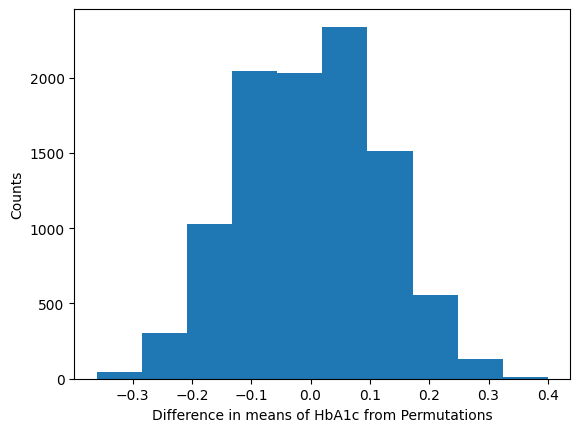

p_value = 0.0


In [22]:
# Step 1 - Decide on the number of times you wish to permute the assignment and
# create an array of that size to store the mean differences
B = 10000
diff_in_means = np.zeros(B)

# Step 2 - Create a loop to permute assignments to control and treatment.
# Also record the mean difference for each permutation
for i in range(B):
  new_assignmet = np.random.permutation(assignment)
  permuted_control_mean = np.mean(outcomes[new_assignmet==0])
  permuted_treatment_mean = np.mean(outcomes[new_assignmet==1])
  diff_in_means[i] = permuted_treatment_mean-permuted_control_mean

# Step 3 - Plot the histogram of the mean differences
fig, ax = plt.subplots()
ax.hist(diff_in_means)
ax.set_xlabel("Difference in means of HbA1c from Permutations")
ax.set_ylabel("Counts")
plt.show()

# Step 4 - Estimate the p-value
p_value = np.mean(np.abs(diff_in_means)>= abs(obs_diff_means))
print(f"p_value = {p_value}")

## Homework
What happens when you do very few permutations, let us say B=10?


# Permutation test _"Could this difference arise by chance?"_

If the information about random assignment of treatment and control groups was not available to us, we could still follow the same steps and ask if the two groups are indeed different, or did the difference arise purely by chance. For a visual intuition of permutation take a look at this [explanation](https://www.jwilber.me/permutationtest/).

In essence:
* Permutation test: shuffle labels whenever you assume exchangeability. The shuffling is justified by an assumption.
* Randomization test: shuffle labels because they were randomized. The shuffling is justified by design.

_Therefore, all randomization tests are permutation tests, but not all permutation tests are randomization tests._

H₀: Treated and untreated patients have the **same** outcomes, i.e., the group labels are **irrelevant**.

H₁: Treated and untreated patients have **different** outcomes, i.e., the group labels are **relevant**.

# Summary

| Method        | What is resampled | Replacement | Goal            |
| ------------- | ----------------- | ----------- | --------------- |
| Bootstrap     | Data values       | With        | Estimation      |
| Permutation   | Labels            | Without     | Hypothesis test |
| Randomization | Assignments       | Without     | Causal test     |
